In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
repo_root = Path.cwd().parent.parent
sys.path.append(str(repo_root))

In [2]:
features_df = pd.read_parquet((repo_root /"data/featured/featured_data.parquet").resolve())

In [3]:
from plot_utils import plot_categorical_target_distribution, plot_numerical_target_bins

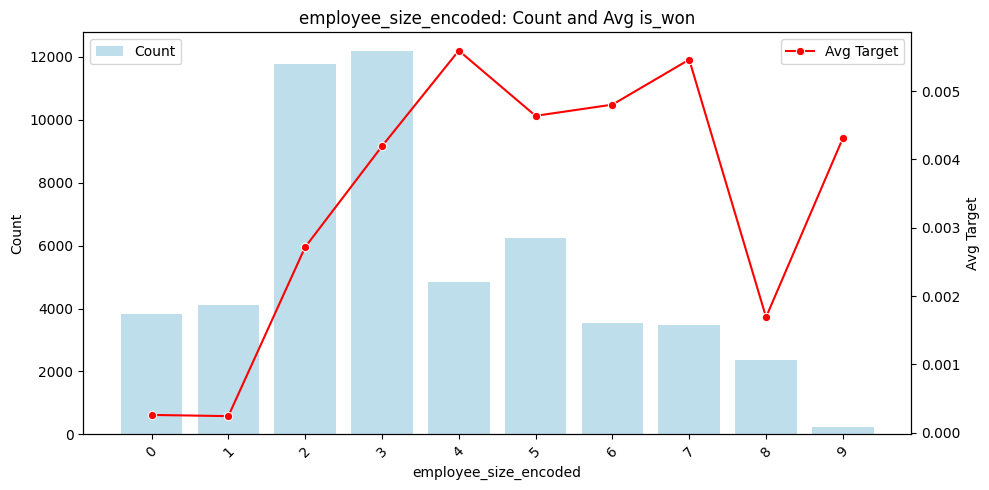

In [4]:
plot_categorical_target_distribution(features_df, 
                                     categorical_col = "employee_size_encoded", 
                                     target_col = "is_won")

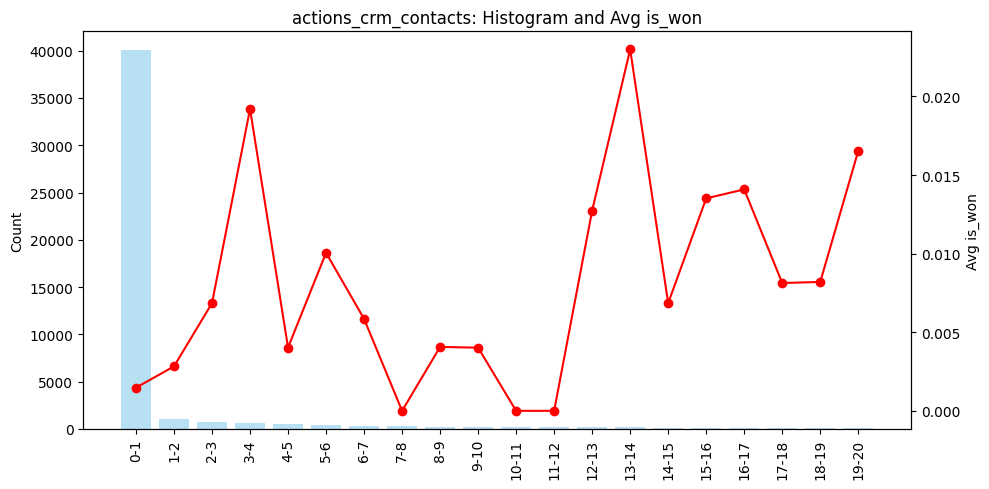

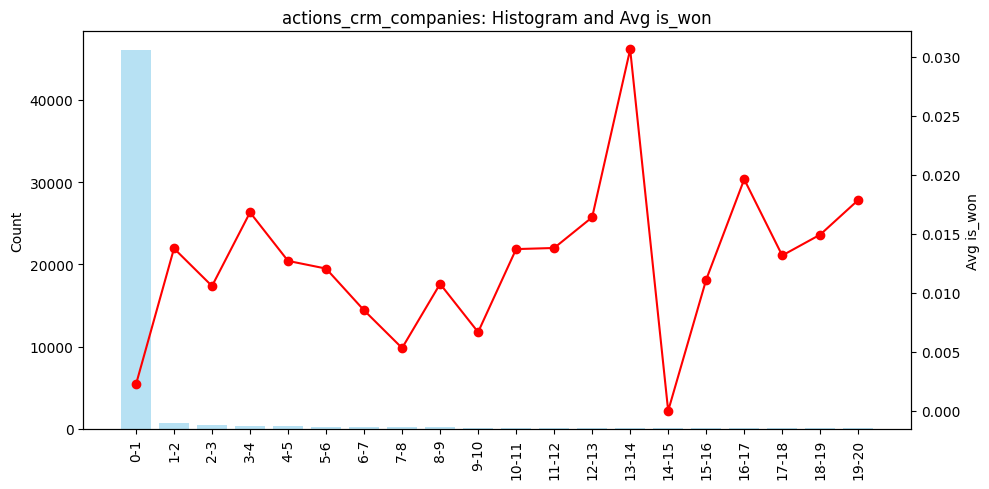

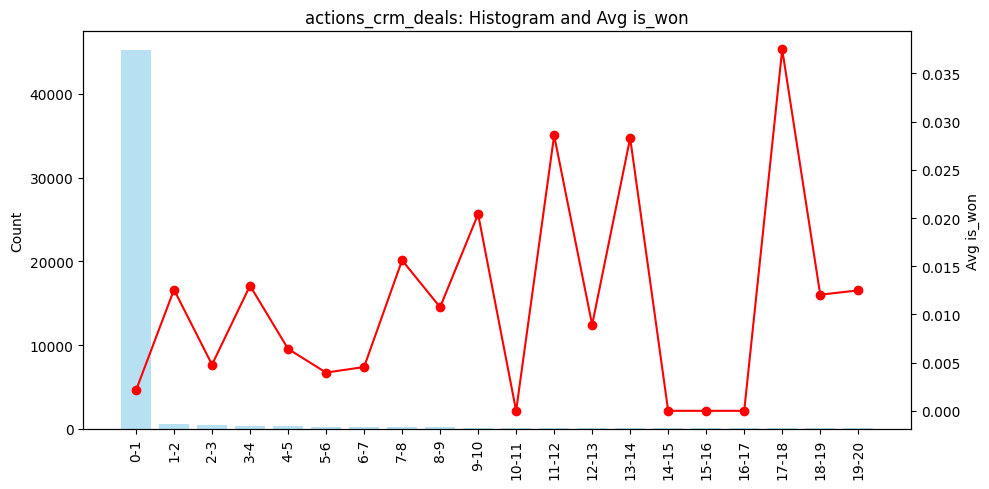

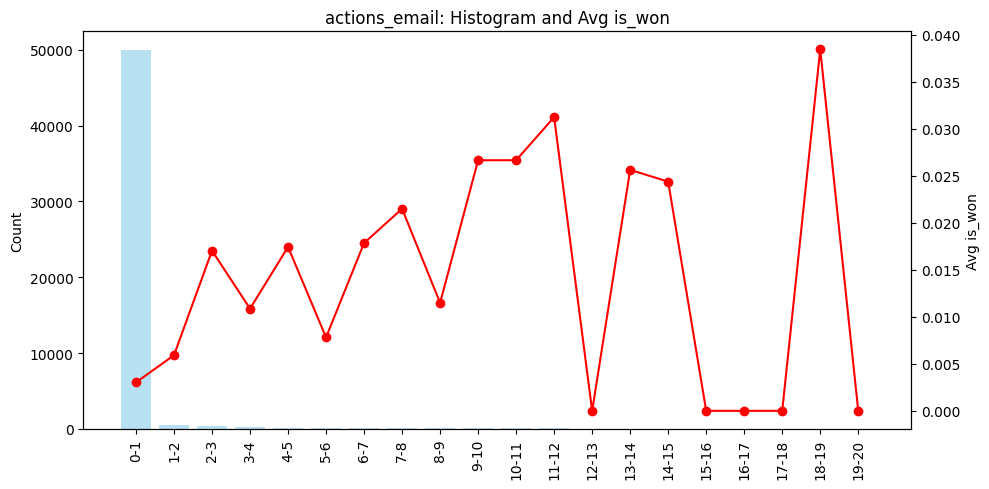

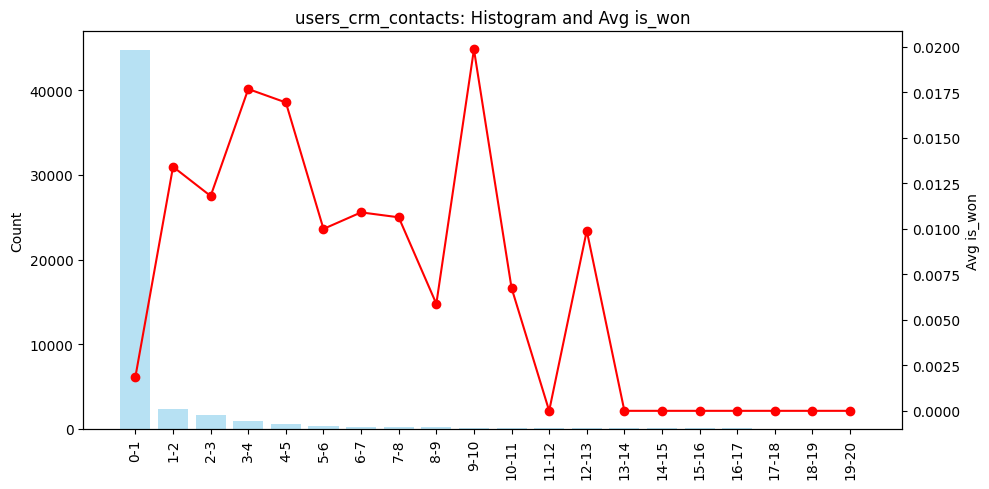

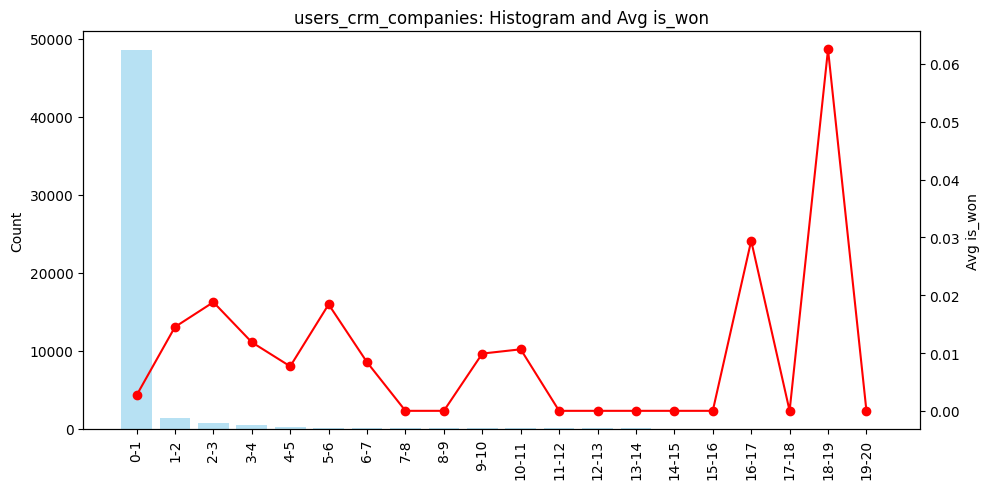

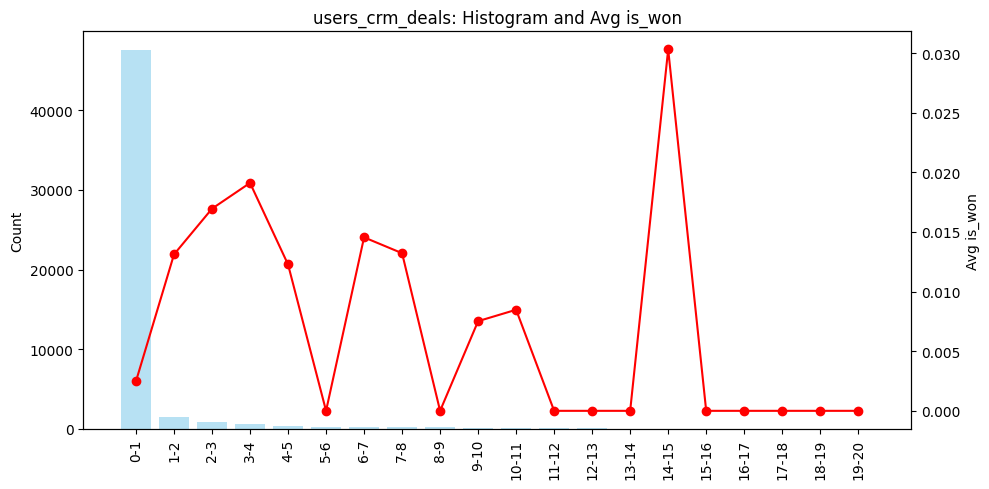

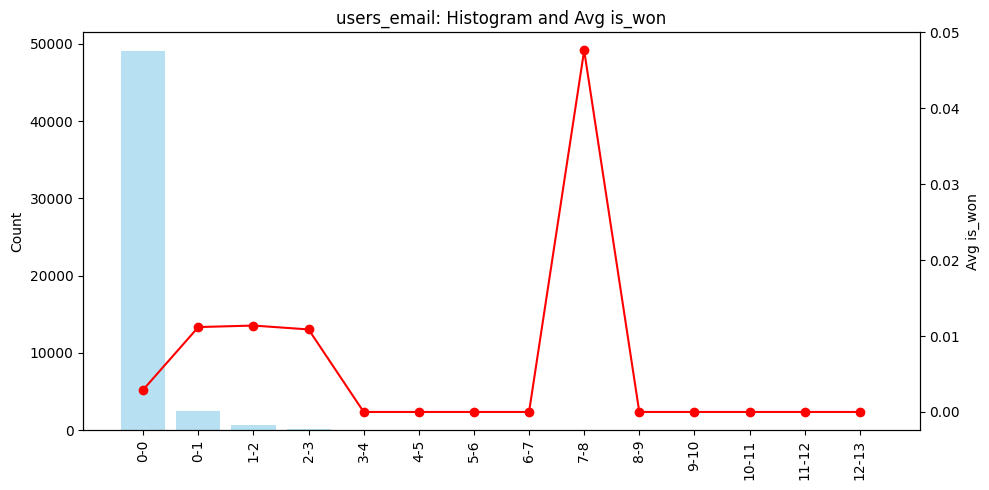

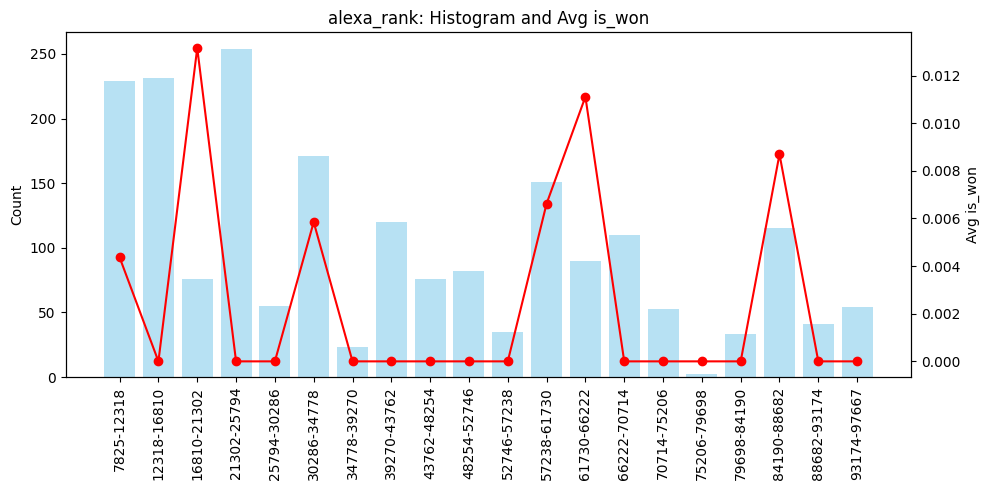

In [13]:
col_name = ['actions_crm_contacts', 'actions_crm_companies',
       'actions_crm_deals', 'actions_email', 'users_crm_contacts',
       'users_crm_companies', 'users_crm_deals', 'users_email', 'alexa_rank']

for col in col_name:
       if col == 'alexa_rank':
              plot_range = (7800, 100000)
       else:
              plot_range = (0,20)

       plot_numerical_target_bins(features_df, 
                            numeric_col = col, 
                            target_col = "is_won",
                            plot_range=plot_range)

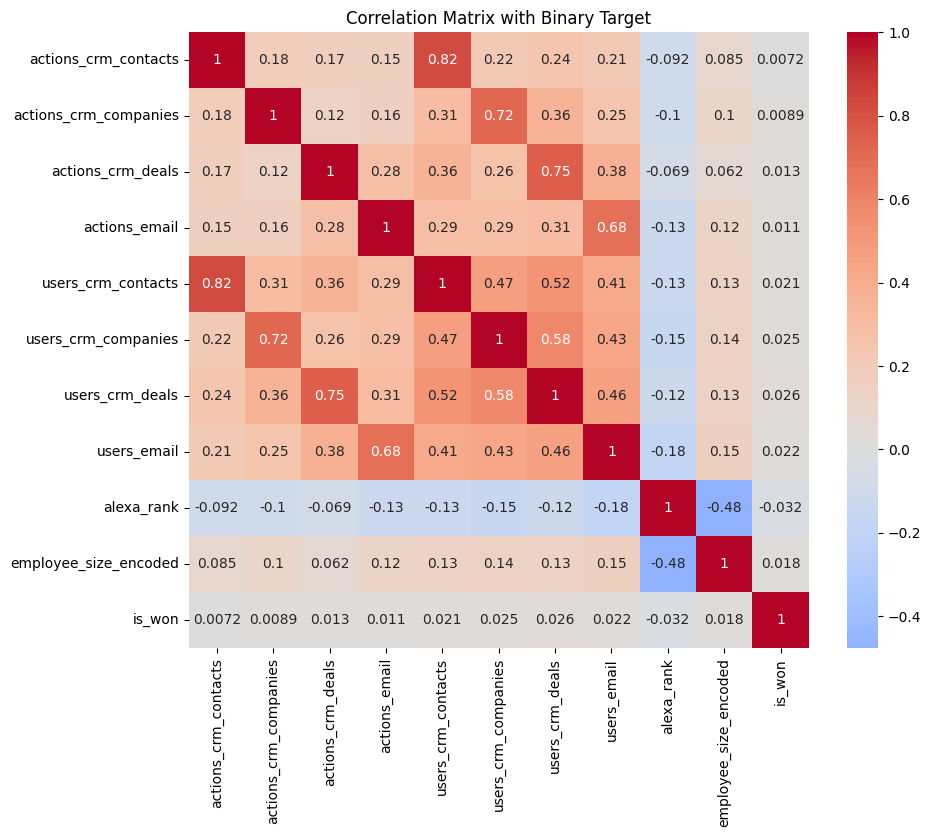

In [7]:
numeric_cols = [ 'actions_crm_contacts',
 'actions_crm_companies',
 'actions_crm_deals',
 'actions_email',
 'users_crm_contacts',
 'users_crm_companies',
 'users_crm_deals',
 'users_email',
 'alexa_rank',
 'employee_size_encoded',
 'is_won']

corr = features_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix with Binary Target")
plt.show()